Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data sets

In [48]:
df0 = pd.read_csv('data/zero_slits.csv', names=['Voltage_0', 'Angle_0'], header=None)
df1 = pd.read_csv('data/one_slit.csv', names=['Voltage_1', 'Angle_1'], header=None)
df2 = pd.read_csv('data/two_slits.csv', names=['Voltage_2', 'Angle_2'], header=None)
df4 = pd.read_csv('data/four_slits.csv', names=['Voltage_4', 'Angle_4'], header=None)
df6 = pd.read_csv('data/six_slits.csv', names=['Voltage_6', 'Angle_6'], header=None)

print(df0.head())

             Voltage_0  Angle_0
2.32 0.0643        NaN      NaN
2.31 0.0692        NaN      NaN
     0.0661        NaN      NaN
     0.0613        NaN      NaN
2.30 0.0535        NaN      NaN


Constants

In [45]:
d = 3.38 # distance from the transmitter to the receiver
DC_PS_voltage = 2.5 # DC level of the variable power supply
osc_freq = 39.65 * 1000 # matching the receiver's resonance frequency
conv_factor = 0.0067 # Slope of the DC voltage as a function of the position
slit_spacing = 29.9/1000 # distance between the slits
slit_width = 0.926/100 # width between the slits
ambient_temp = 25 # ambient temperature measured in the room

# wavelength of sound
v_air = 331.3 * np.sqrt(1 + ambient_temp/273.15)
wavelength = v_air / osc_freq

2. Converting potentiometer voltages to angles with $\Theta=0$ corresponding to the location of the central peak, and plotting graphs of $A^2$ versus $\Theta$ for each data set

3. Theoretical comparison
(a) Finding $A_N$ for each $N$

In [46]:
max_height = np.array([1.49, 1.14, 5.99e-1, 3.53e-1, 2.09e-1])
N = np.array([6.,4.,2.,1.,0.])
A_N = []
for i in range(len(N)):
    if N[i] != 0:  # Avoid division by zero
        A_N.append(max_height[i] / N[i])

for i in range(len(A_N)):
    print(f"For N = {N[i]}, A_N = {A_N[i]:.4f}")

For N = 6.0, A_N = 0.2483
For N = 4.0, A_N = 0.2850
For N = 2.0, A_N = 0.2995
For N = 1.0, A_N = 0.3530


(b) Finding expected amplitude versus angle for each data set with plots

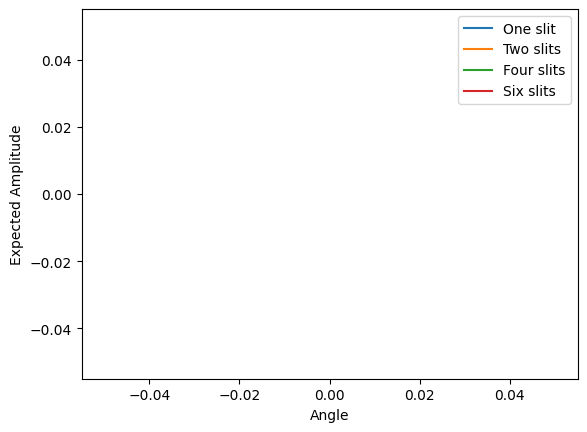

In [47]:
# finding phi at a given angle
k = 2 * np.pi / wavelength
def phi(angle):
    return k * slit_width * np.sin(angle)

# finding the expected amplitude versus angle for each data set
def beta(angle):
    return k * slit_spacing * np.sin(angle)

""" # zero slits
A_N_0 = A_N[4]
N_0 = N[4]
angle_0 = df0['Angle_0']

expected_amplitude_0 = A_N_0 * np.sin(phi(angle_0)/2)**2 / (phi(angle_0)/2)**2 * np.sin(N_0 * beta(angle_0)/2)**2 / np.sin(beta(angle_0)/2)**2 """

# one slit
A_N_1 = A_N[3]
N_1 = N[3]
angle_1 = df1['Angle_1']

expected_amplitude_1 = A_N_1 * np.sin(phi(angle_1)/2)**2 / (phi(angle_1)/2)**2 * np.sin(N_1 * beta(angle_1)/2)**2 / np.sin(beta(angle_1)/2)**2

# two slits
A_N_2 = A_N[2]
N_2 = N[2]
angle_2 = df2['Angle_2']

expected_amplitude_2 = A_N_2 * np.sin(phi(angle_2)/2)**2 / (phi(angle_2)/2)**2 * np.sin(N_2 * beta(angle_2)/2)**2 / np.sin(beta(angle_2)/2)**2

# four slits
A_N_4 = A_N[1]
N_4 = N[1]
angle_4 = df4['Angle_4']

expected_amplitude_4 = A_N_4 * np.sin(phi(angle_4)/2)**2 / (phi(angle_4)/2)**2 * np.sin(N_4 * beta(angle_4)/2)**2 / np.sin(beta(angle_4)/2)**2

# six slits
A_N_6 = A_N[0]
N_6 = N[0]
angle_6 = df6['Angle_6']

expected_amplitude_6 = A_N_6 * np.sin(phi(angle_6)/2)**2 / (phi(angle_6)/2)**2 * np.sin(N_6 * beta(angle_6)/2)**2 / np.sin(beta(angle_6)/2)**2

## Write the outputs to files
with open('output/expected_amplitude1.txt', 'w') as f:
    print(expected_amplitude_1, file=f)

with open('output/expected_amplitude2.txt', 'w') as f:
    print(expected_amplitude_2, file=f)

with open('output/expected_amplitude4.txt', 'w') as f:
    print(expected_amplitude_4, file=f)

with open('output/expected_amplitude6.txt', 'w') as f:
    print(expected_amplitude_6, file=f)

# Plot for zero slits
# plt.plot(angle_0, expected_amplitude_0, label='Zero slits')

# Plot for one slit
plt.plot(angle_1, expected_amplitude_1, label='One slit')

# Plot for two slits
plt.plot(angle_2, expected_amplitude_2, label='Two slits')

# Plot for four slits
plt.plot(angle_4, expected_amplitude_4, label='Four slits')

# Plot for six slits
plt.plot(angle_6, expected_amplitude_6, label='Six slits')

# Add a legend
plt.legend()

# Add x and y labels
plt.xlabel('Angle')
plt.ylabel('Expected Amplitude')

# Show the plot
plt.show()